# LED Strip Tree Estimates using an Archimedean Spiral as an Approximation

## References

https://en.wikipedia.org/wiki/Archimedean_spiral  
http://www.mathematische-basteleien.de/spiral.htm  
http://mathworld.wolfram.com/ArchimedeanSpiral.html
https://www.comsol.com/blogs/how-to-build-a-parameterized-archimedean-spiral-geometry/
https://phdmath.wordpress.com/2010/02/24/arc-length-2/


http://mathworld.wolfram.com/ConicalSpiral.html <- this is what I am trying to get done...
https://www.reddit.com/r/askmath/comments/2l9w5j/spiral_around_a_cone/ <- uses simple trig to solve the problem...

http://www.intmath.com/blog/mathematics/arc-length-of-a-spiral-around-a-paraboloid-8751 <- good site; posted a couple of comments. Looks like they use the computer algebra systems to solve the problems as well

In [3]:
# decide whether charts will be displayed interactively or in a format that exports to pdf

# Interactive -----------------
# For interactive notebook uncomment:
%matplotlib notebook

# PDF -----------------
# For pdf plotting uncomment:
# %matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')

#------------
# Setup matplotlib
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D # handle 3D plots
import matplotlib as mpl

# uncomment the following if you have more then 40 plots
# mpl.rcParams['figure.max_open_warning'] = 60
mpl.rc('font',family='monospace') # all font on the plot will be monospace

# get plotted images to be stored as png and pdf so that the most appropriate form can be selected
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

# ----------------------
# Import Standard Modules
import numpy as np
import math
import os
import glob
import pandas
from collections import namedtuple
from scipy.optimize import curve_fit

# ----------------------
# Import Custom Modules
import sys
sys.path.append("../../common_modules") # <- this is the folder where standard items will be stored

# load any of the common modules that are required
import standard_figure 

# Standard Figure usage
# Usage:
# x = [1,2,3,4,5]
# y = [1,2,3,4,5]

# fig, ax = standard_figure.create_standard_figure('Example Chart',
#                                  'X',
#                                  'Y', 
#                                  figsize=(8, 8),
#                                  axes_rect=(0.08, 0.06, 0.9, 0.9))

# ax.plot(x, y, '-', label='Testing')

# ax.legend(loc='best')
# fig.show()
#---------------
# import units
from units import Units
u = Units()

In [7]:
%%javascript
//Disable autoscroll in the output cells - needs to be in a separate cell with nothing else
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In 2 Dimensions and for the simple Archimedes spiral, the radius $r(\theta)$ and the angle $\theta$ are proportional. Therefore the equation is as follows:

$$r(\theta) = b \cdot \theta$$

<span class="mark">NOTE: The distance between two successive turns is $d = 2 \pi b$</span>

Based on that note, we should be able to solve for a $a$ value that will give us a particular distance

<span class="mark">NOTE: the general equation is $r(\theta) = a + b \cdot \theta$ where $a$ is the initial radius and $b$ helps define the distance between successive turns.</span>

The equation can be expressed in a parametric form:

$$x(\theta) = b \cdot \theta \cdot \cos (\theta)$$
$$y(\theta) = b \cdot \theta \cdot \sin (\theta)$$

From http://www.mathematische-basteleien.de/spiral.htm  we wish to make a conical helix with the Archimedean spiral:

<img src="spiral22.gif"/>

To extend that to the third dimension, we use add:

$$z(\theta) = \theta$$


Let's start by plotting a 2D spiral:

<IPython.core.display.Javascript object>


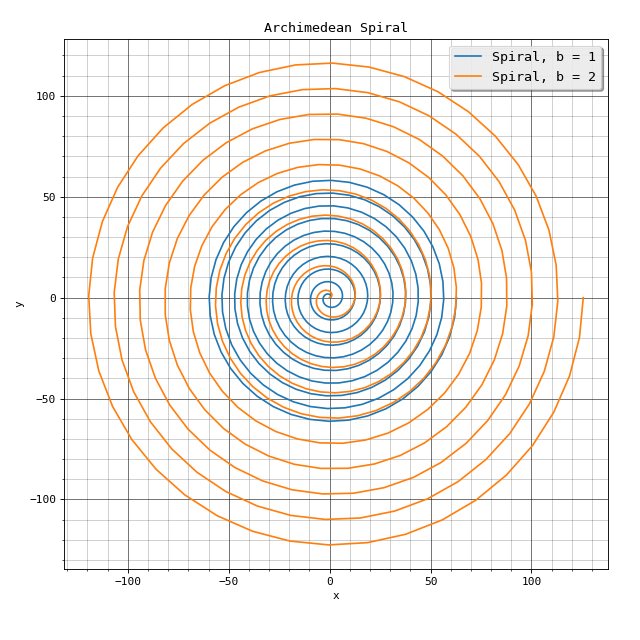

In [9]:
fig, ax = standard_figure.create_standard_figure('Archimedean Spiral',
                                 'x',
                                 'y',                                                 
                                 figsize=(8, 8),                                                  
                                 axes_rect=(0.1, 0.1, 0.85, 0.85)) # rect [left, bottom, width, height]

theta = np.linspace(0.0, 20*np.pi, 400)

# for a in [10, 5, 3, 1]:        
for b in [1, 2]:        
    x = b*theta*np.cos(theta)
    y = b*theta*np.sin(theta)
    ax.plot(x, y, '-', label='Spiral, b = {}'.format(b))

ax.legend(loc='best', 
          shadow=True, 
          fancybox=True,
          prop={'family': 'monospace', 'size':12},
          frameon=True)

# ax.axis([-1, 100, 
#            0, 10])

# make sure the aspect ratio of the plot is equal
ax.set_aspect('equal') 

fig.show() 

Let's just deal with $a = 1$ as it seems to make the base really big

<IPython.core.display.Javascript object>


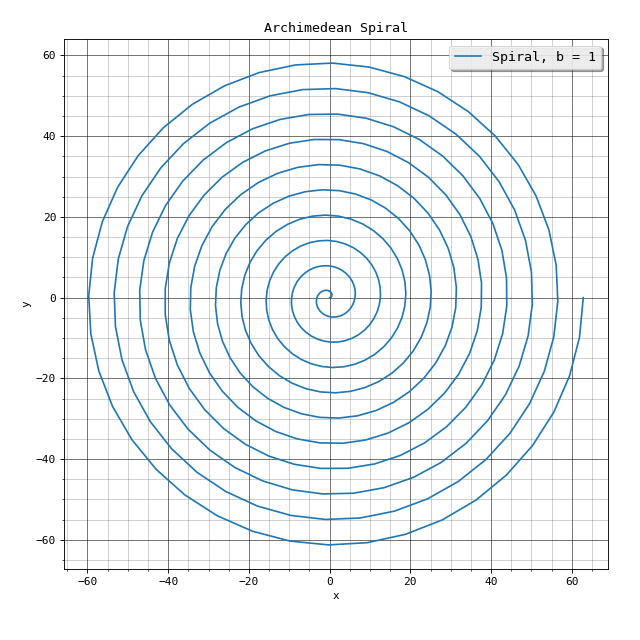

In [11]:
fig, ax = standard_figure.create_standard_figure('Archimedean Spiral',
                                 'x',
                                 'y',                                                 
                                 figsize=(8, 8),                                                  
                                 axes_rect=(0.1, 0.1, 0.85, 0.85)) # rect [left, bottom, width, height]

theta = np.linspace(0.0, 20*np.pi, 400)

for b in [1]:        
    x = b*theta*np.cos(theta)
    y = b*theta*np.sin(theta)
    ax.plot(x, y, '-', label='Spiral, b = {}'.format(b))

ax.legend(loc='best', 
          shadow=True, 
          fancybox=True,
          prop={'family': 'monospace', 'size':12},
          frameon=True)

# make sure the aspect ratio of the plot is equal
ax.set_aspect('equal') 

fig.show() 

Let's figure out in 3D how far the standard spiral stretches...

<IPython.core.display.Javascript object>


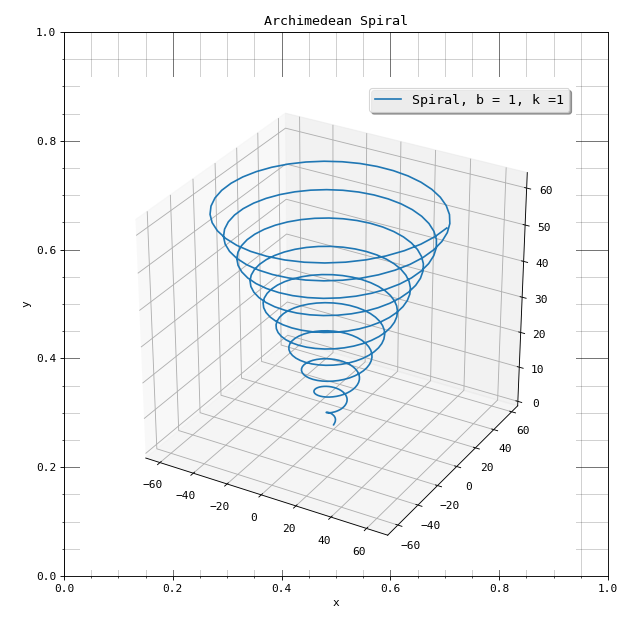

In [12]:
fig, ax = standard_figure.create_standard_figure('Archimedean Spiral',
                                   'x',
                                   'y',                                                 
                                   figsize=(8, 8),                                                  
                                   axes_rect=(0.1, 0.1, 0.85, 0.85)) # rect [left, bottom, width, height]

ax = fig.gca(projection='3d')

theta = np.linspace(0.0, 20*np.pi, 400)
k = 1

for b in [1]:        
    x = b*theta*np.cos(theta)
    y = b*theta*np.sin(theta)    
    z = k*theta
    
    ax.plot(x, y, z, '-', label='Spiral, b = {}, k ={}'.format(b, k))

ax.legend(loc='best', 
          shadow=True, 
          fancybox=True,
          prop={'family': 'monospace', 'size':12},
          frameon=True)

# make sure the aspect ratio of the plot is equal
ax.set_aspect('equal') 

fig.show() 

From the 3D view it seems that it will stretch to about 65cm or so and will have about 10 or so spirals. 

I think that would be nice but I think it would be a lot of tape. Let's figure out what the line length is..

We can add a constant of some sort to $z(\theta) = k \cdot \theta$ where $k$ would control the distance between successive loops of the spiral.


## Arc Length of a Curve in Polar Coordinates

http://www.intmath.com/blog/mathematics/length-of-an-archimedean-spiral-6595

http://www.intmath.com/applications-integration/12-arc-length-curve-parametric-polar.php

http://tutorial.math.lamar.edu/Classes/CalcIII/VectorArcLength.aspx


We want to determine the length of a vector function:

$$ \vec r \left(t \right) = \left \langle f(t), g(t), h(t) \right \rangle $$



Writing the vector function in parametric form:

$$x = f(t)$$

$$y = g(t)$$

$$z = h(t)$$

In 3 Dimensions, the length of the curve, $ \vec r \left(t \right)$ on the interval $m_1 \le t \le m_2$ is:

$$ L = \int_{m_1}^{m_1} \sqrt{f'(t)^2 + h'(t)^2 + g'(t)^2} \; \frac{\mathrm{d} }{\mathrm{d} t}  $$

NOTE: In this case $t = \theta$. From this point forward we will use $t$.

The parametric equations for the spiral are:

$$x(t) = b \cdot t \cdot \cos (t)$$
$$y(t) = b \cdot t \cdot \sin (t)$$
$$z(t) = k \cdot t$$

Where $b$ and $k$ are constants that control the shape and height of the spiral and $t$ is the angle in radians.


Let's find the derivatives of the equations:

$$ x'(t) =  b \cdot \left(\cos(t) - t \sin(t) \right) $$

$$y'(t) = b \cdot \left(\sin(t) + t \cdot \cos(t) \right)$$

$$z'(t) = k$$

Let's deal with the polynomial in the radical first:

$$f'(x)^2 = \left( b \cdot \left(\cos(t) - t \sin(t) \right) \right)^2$$

$$ f'(x)^2 = b^2 \cos^2 t - b^2 t \sin(2 t) + b^2 t^2 \sin^2 t$$

Where:

$$\sin(2 t) = 2 \sin(t) \cos(t)$$
$$\sin(t) \cos(t) = \frac{1}{2} \cdot \sin(2 t)$$

$$ \sin^2 t + \cos^2 t = 1$$


$$h'(t)^2 = \left( b \cdot \left(\sin(t) + t \cdot \cos(t) \right) \right)^2$$

$$ h'(t)^2 = b^2 \sin^2 t + b^2 t \sin (2 t) + b^2 t^2 \cos^2 t$$


$$g'(t)^2 = k^2$$

$$f'(t)^2 + h'(t)^2 + g'(t)^2 = b^2 + b^2 t^2 + k^2$$

$$ L = \int_{m_1}^{m_2} \sqrt{b^2 + b^2 t^2 + k^2} \; \frac{\mathrm{d} }{\mathrm{d} t}  $$

Let's solve the integral:

http://www.integral-calculator.com/



Substitute:

$$t=\frac{\sqrt{k^2+b^2}\tan\left(u\right)}{b} \rightarrow u=\arctan\left(\dfrac{bt}{\sqrt{k^2+b^2}}\right)$$

$$ \dfrac{\mathrm{d}t}{\mathrm{d}u}=\dfrac{\sqrt{k^2+b^2}\sec^2\left(u\right)}{b}  $$

$$ ={\displaystyle\int}\dfrac{\sqrt{k^2+b^2}\sec^2\left(u\right)\sqrt{\left(k^2+b^2\right)\tan^2\left(u\right)+k^2+b^2}}{b}\,\mathrm{d}u$$



Simplify using:

$$\left(k^2+b^2\right)\tan^2\left(u\right)+k^2+b^2=\left(k^2+b^2\right)\sec^2\left(u\right)$$

Becomes:

$$=\class{steps-node}{\cssId{steps-node-1}{\dfrac{k^2+b^2}{b}}}{\displaystyle\int}\sec^3\left(u\right)\,\mathrm{d}u$$

Now Solving:

$${\displaystyle\int}\sec^3\left(u\right)\,\mathrm{d}u$$

Apply reduction formula with $n=3$:

$$\small{{\displaystyle\int}\sec^{\mathtt{n}}\left(u\right)\,\mathrm{d}u=\class{steps-node}{\cssId{steps-node-2}{\dfrac{\mathtt{n}-2}{\mathtt{n}-1}}}{\displaystyle\int}\sec^{\mathtt{n}-2}\left(u\right)\,\mathrm{d}u+\dfrac{\sec^{\mathtt{n}-2}\left(u\right)\tan\left(u\right)}{\mathtt{n}-1}}$$

$$=\class{steps-node}{\cssId{steps-node-3}{\dfrac{1}{2}}}{\displaystyle\int}\sec\left(u\right)\,\mathrm{d}u+\dfrac{\sec\left(u\right)\tan\left(u\right)}{2}$$


Now Solving:

$${\displaystyle\int}\sec\left(u\right)\,\mathrm{d}u =\ln\left(\tan\left(u\right)+\sec\left(u\right)\right)$$

The solution is a standard integral...

Plugin solved integrals:

$$\class{steps-node}{\cssId{steps-node-4}{\dfrac{1}{2}}}{\displaystyle\int}\sec\left(u\right)\,\mathrm{d}u+\dfrac{\sec\left(u\right)\tan\left(u\right)}{2} =\dfrac{\ln\left(\tan\left(u\right)+\sec\left(u\right)\right)}{2}+\dfrac{\sec\left(u\right)\tan\left(u\right)}{2}$$

$$\class{steps-node}{\cssId{steps-node-5}{\dfrac{k^2+b^2}{b}}}{\displaystyle\int}\sec^3\left(u\right)\,\mathrm{d}u =\dfrac{\left(k^2+b^2\right)\ln\left(\tan\left(u\right)+\sec\left(u\right)\right)}{2b}+\dfrac{\left(k^2+b^2\right)\sec\left(u\right)\tan\left(u\right)}{2b}$$

Undo substitution:

$$u=\arctan\left(\dfrac{bt}{\sqrt{k^2+b^2}}\right)$$

Use:

$$\tan\left(\class{steps-node}{\cssId{steps-node-6}{\arctan\left(\dfrac{bt}{\sqrt{k^2+b^2}}\right)}}\right)=\dfrac{bt}{\sqrt{k^2+b^2}}$$

$$\sec\left(\class{steps-node}{\cssId{steps-node-7}{\arctan\left(\dfrac{bt}{\sqrt{k^2+b^2}}\right)}}\right)=\sqrt{\dfrac{b^2t^2}{k^2+b^2}+1}$$

$$=\dfrac{\left(k^2+b^2\right)\ln\left(\sqrt{\frac{b^2t^2}{k^2+b^2}+1}+\frac{bt}{\sqrt{k^2+b^2}}\right)}{2b}+\dfrac{\sqrt{k^2+b^2}t\sqrt{\frac{b^2t^2}{k^2+b^2}+1}}{2}$$

Solution:
$${\displaystyle\int}\sqrt{b^2t^2+k^2+b^2}\,\mathrm{d}t =\dfrac{\left(k^2+b^2\right)\ln\left(\left|\sqrt{\frac{b^2t^2}{k^2+b^2}+1}+\frac{bt}{\sqrt{k^2+b^2}}\right|\right)}{2b}+\dfrac{\sqrt{k^2+b^2}t\sqrt{\frac{b^2t^2}{k^2+b^2}+1}}{2}+C =\dfrac{\left(k^2+b^2\right)\ln\left(\left|\sqrt{b^2\left(t^2+1\right)+k^2}+bt\right|\right)+bt\sqrt{b^2\left(t^2+1\right)+k^2}}{2b}+C$$

Applying the limits will eliminate the constant...

In [13]:
def spiral_arc_length(b, k, t):
    """
    This is an implementation of the integral soltion to calculating the arc length of the 3D conic
    spiral.
    
    b - 2*pi*b is the distance between successive turns in the spiral
    k - This is a constant applied to the z axis so that it can expand or shrink the curve. If it is 1, then
        the curve z portion will be defined by the theta value
    t - The length of the curve to a particular angle in radians
    
    
    Returns the length of the curve at angle t
    """
        
    sqr = np.sqrt(b**2*(t**2 + 1) + k**2)
    
    return ((k**2 + b**2)*np.log(sqr + b*t) + b*t*sqr)/2*b      
    

In [14]:
b = 1
k = 1
t_min = 0
t_max = 20*np.pi

l_max = spiral_arc_length(b, k, t_max)
l_min = spiral_arc_length(b, k, t_min)

l = l_max - l_min

print('l_max = {}'.format(l_max))
print('l_min = {}'.format(l_min))
print('Sprial Length = {:.3f} (cm)'.format(l))
print('Sprial Length = {:.3f} (m)'.format(l/100))

l_max = 1979.254552875556
l_min = 0.3465735902799727
Sprial Length = 1978.908 (cm)
Sprial Length = 19.789 (m)


In [15]:
def conic_spiral_coordinates(b, k, angle):
    """
    Calculate the x,y,z on the conic spiral given the angle (in radians) and the curve b and k value.
    
    b - used in determining the distance between turns
    k - a value used to control how t he curve is stretched/compressed in the z direction
    
    return (x, y ,z)
    
    """
    x = b*angle*np.cos(angle)
    y = b*angle*np.sin(angle)    
    z = k*angle
    
    return x, y, z

def plot_spiral(b, k, t_min, t_max, **kwargs):
    plot_spiral2([(b, k, t_min, t_max)], **kwargs)
    
    
def plot_spiral2(data, **kwargs):
    
    fig, ax = standard_figure.create_standard_figure('Archimedean Spiral',
                                       'x',
                                       'y',                                                 
                                       figsize=(9, 8),                                                  
                                       axes_rect=(0.1, 0.1, 0.85, 0.85)) # rect [left, bottom, width, height]

    ax = fig.gca(projection='3d')

    if 'elevation' in kwargs:
        ax.elev = kwargs['elevation']
    
    if 'azimuth' in kwargs:
        ax.azim = kwargs['azimuth']
            
    for row in data:
        b, k, t_min, t_max = row
    
        theta = np.linspace(t_min, t_max, 400)
        
        x, y, z = conic_spiral_coordinates(b, k, theta)
        

        l_max = spiral_arc_length(b, k, t_max)
        l_min = spiral_arc_length(b, k, t_min)

        l = l_max - l_min

        ax.plot(x, y, z, '-', label='b = {:3.2f}, k = {:3.2f}, Arc length = {:3.2f}, Height = {:3.2f}, Diameter = {:3.2f}'.format(b, k, l, np.max(z), 2*np.max(x)))

    if 'intersection_points' in kwargs:        
        plt.plot(*zip(* kwargs['intersection_points']), 'o')
        
    ax.legend(loc='best', 
              shadow=True, 
              fancybox=True,
              prop={'family': 'monospace', 'size':8},
              frameon=True)

    # make sure the aspect ratio of the plot is equal
    ax.set_aspect('equal') 

    fig.show() 

<IPython.core.display.Javascript object>


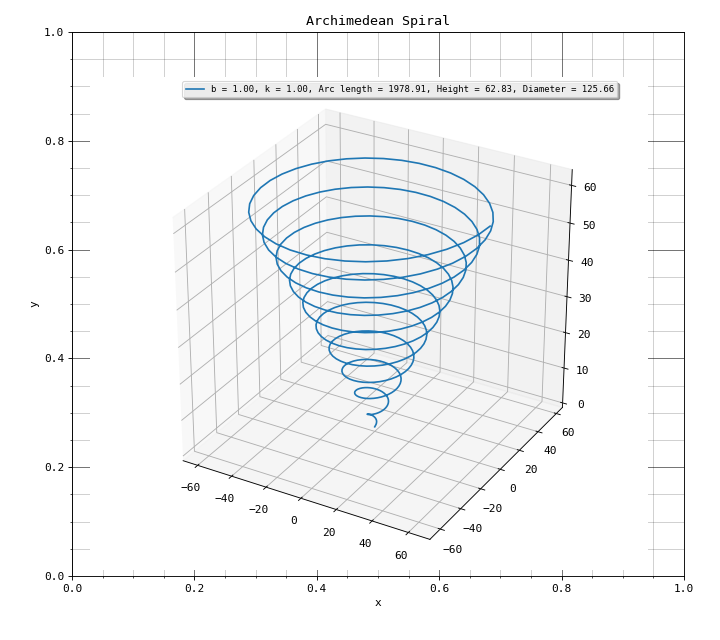

<IPython.core.display.Javascript object>


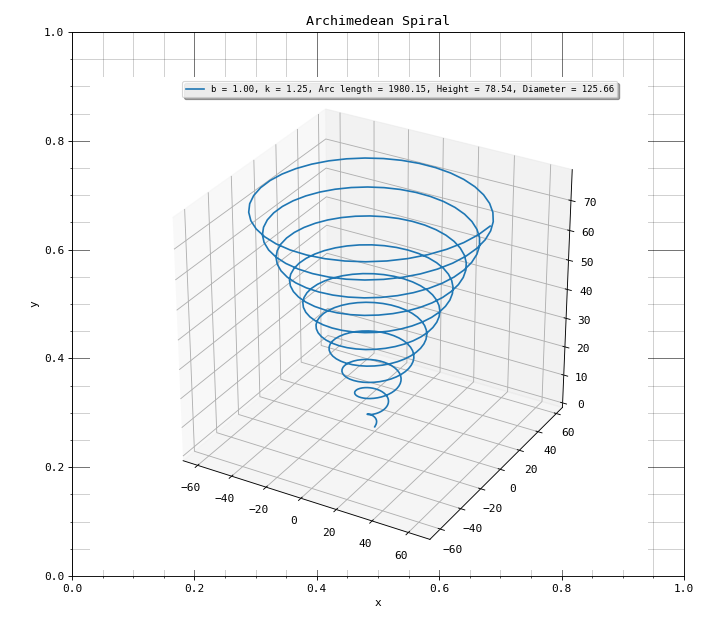

<IPython.core.display.Javascript object>


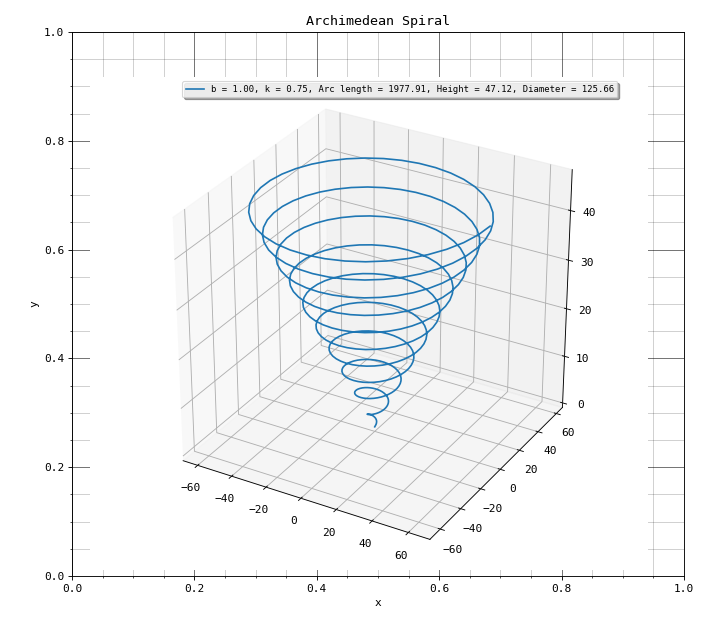

<IPython.core.display.Javascript object>


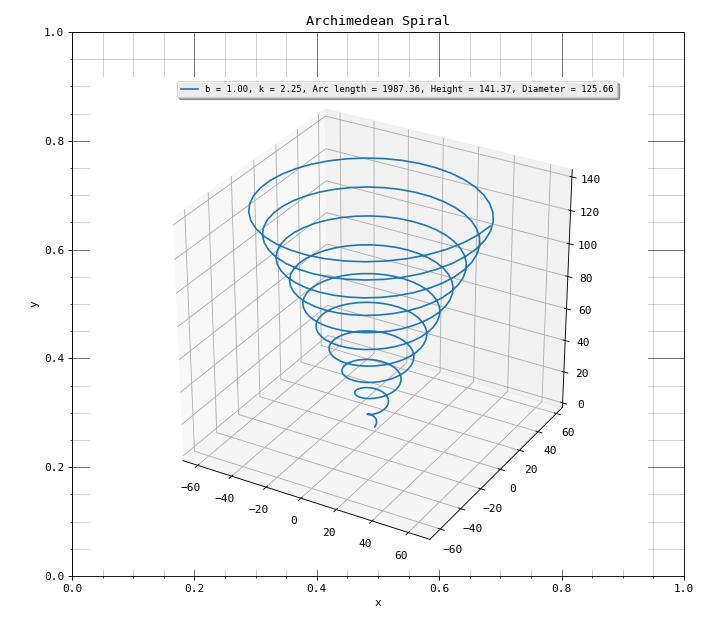

In [16]:
t_min = 0.0
t_max = 20.0*np.pi
for b, k in [(1, 1), (1, 1.25), (1, 0.75), (1, 2.25) ]:        
    plot_spiral(b, k, t_min, t_max)

From the above, changing the b and k value while holding the angles constant results in pretty much the same length of line being used...

So what we can do is solve the equation numerically for an angle that will give use


In [17]:
import scipy.optimize as optimize

# import scipy.optimize as optimize

def func(x):
    return np.cos(x)**2 + 6 - x

# 0<=cos(x)**2<=1, so the root has to be between x=6 and x=7
print(optimize.bisect(func, 6, 7))
# 6.77609231632


6.776092316320501


In [18]:
def target_function(L, b, k, t_min, t_max):
    """
    This is the implementation of the equation to find the optimal angle value given a target length...
    """
    return L - (spiral_arc_length(b, k, t_max) - spiral_arc_length(b, k, t_min))


In [19]:
def bisection_wrapper(L, b, k, t_min):
    
    def target_function_constant(x):              
        return target_function(L, b, k, t_min, x)

    return target_function_constant    

<IPython.core.display.Javascript object>


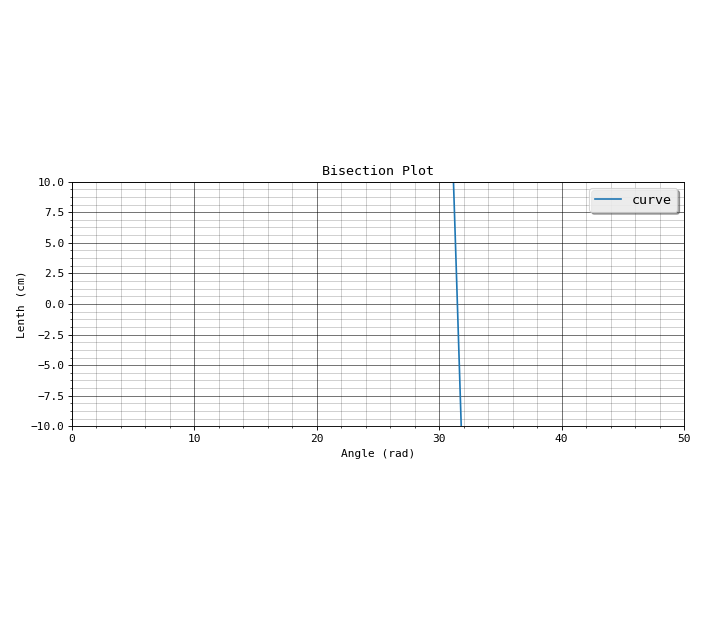

In [20]:
L = 500
b = 1
k = 1
t_min = 0

tf = bisection_wrapper(L, b, k, t_min)

fig, ax = standard_figure.create_standard_figure('Bisection Plot',
                                 'Angle (rad)',
                                 'Lenth (cm)',                                                 
                                 figsize=(9, 8),                                                  
                                 axes_rect=(0.1, 0.1, 0.85, 0.85)) # rect [left, bottom, width, height]



x = np.linspace(30, 40, 400)
y = tf(x)
ax.plot(x, y, '-', label='curve')


ax.legend(loc='best', 
          shadow=True, 
          fancybox=True,
          prop={'family': 'monospace', 'size':12},
          frameon=True)

ax.axis([0, 50, -10, 10])

# make sure the aspect ratio of the plot is equal
ax.set_aspect('equal') 

fig.show() 

In [21]:
x_lower = 30
x_upper = 32

print(x_lower/np.pi)
print(x_upper/np.pi)


9.549296585513721
10.185916357881302


m_test(t_min) = 500.0
m_test(32) = -1478.907979285276
Angle = 31.48661975138447


<IPython.core.display.Javascript object>


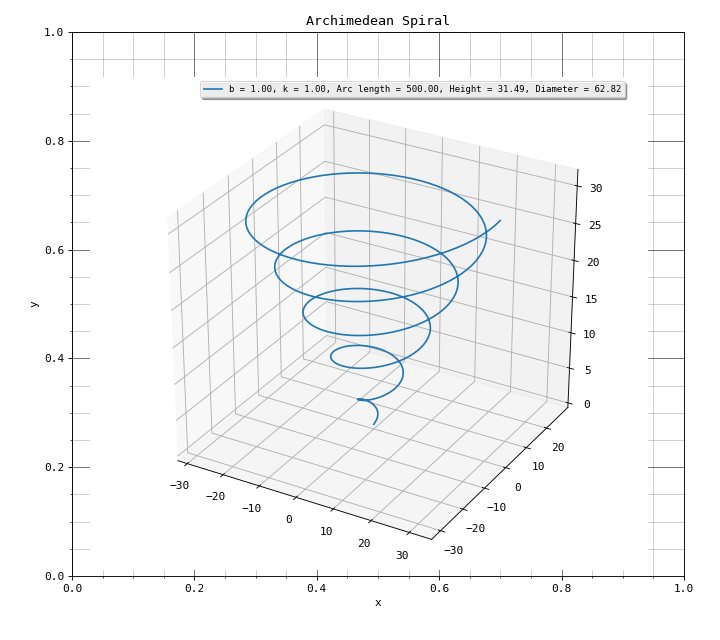

In [22]:
L = 500
b = 1
k = 1
t_min = 0.0

m_test = bisection_wrapper(L, b, k, t_min)
print('m_test(t_min) = {}'.format(m_test(t_min)))
print('m_test(32) = {}'.format(m_test(20*np.pi)))


o = optimize.bisect(bisection_wrapper(L, b, k, t_min), t_min,  20*np.pi)
print('Angle = {}'.format(o))

plot_spiral(b, k, t_min, o)

The above code works and finds the correct length of the spiral given the constraints.

<IPython.core.display.Javascript object>


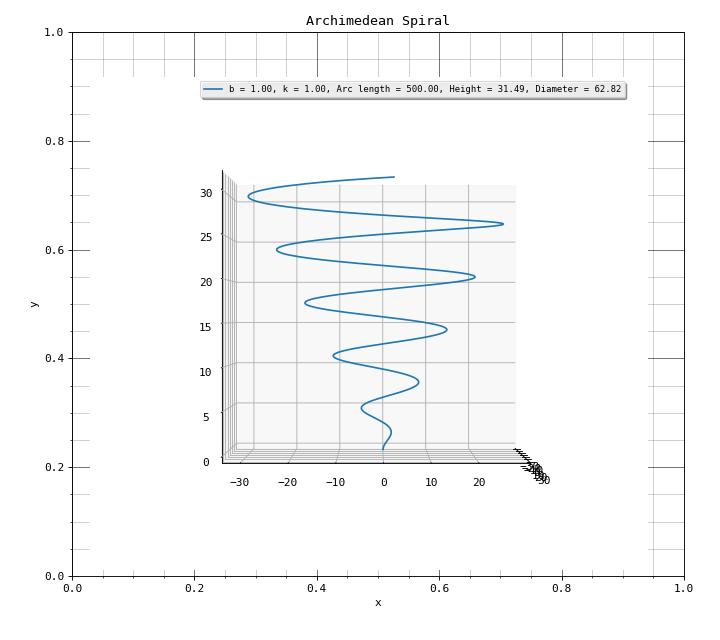

<IPython.core.display.Javascript object>


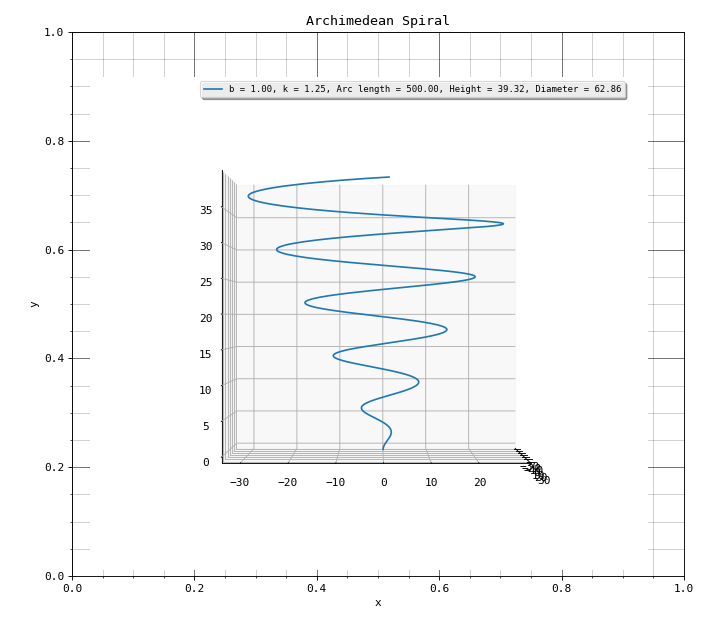

<IPython.core.display.Javascript object>


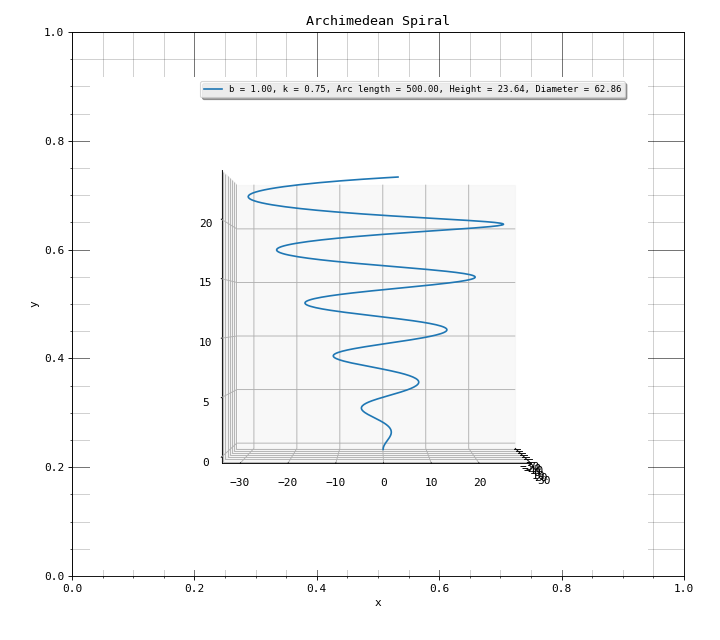

<IPython.core.display.Javascript object>


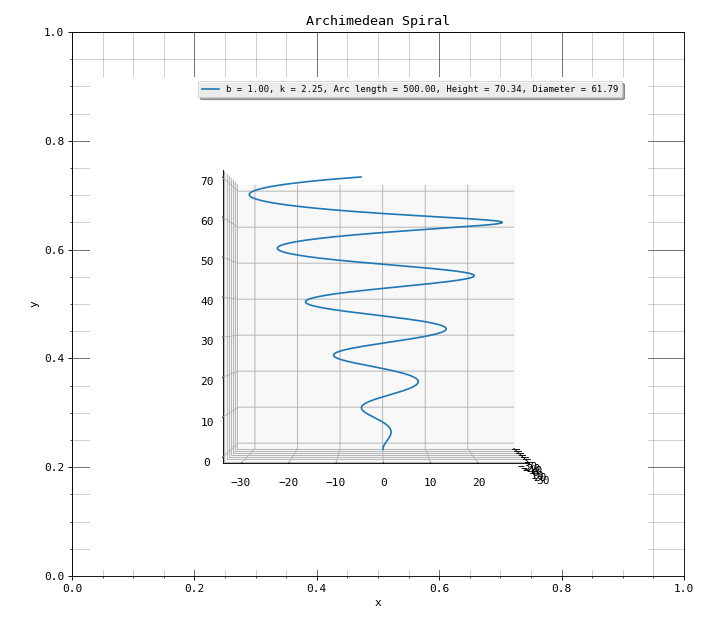

In [23]:
L = 500
t_min = 0.0
t_max = 20.0*np.pi
m_test = bisection_wrapper(L, b, k, t_min)

for b, k in [(1, 1), (1, 1.25), (1, 0.75), (1, 2.25) ]:        
    o = optimize.bisect(bisection_wrapper(L, b, k, t_min), t_min,  t_max)
#     plot_spiral(b, k, t_min, o, elevation=90.0, azimuth=0.0)
    plot_spiral(b, k, t_min, o, elevation=0.0, azimuth=0.0)

<IPython.core.display.Javascript object>


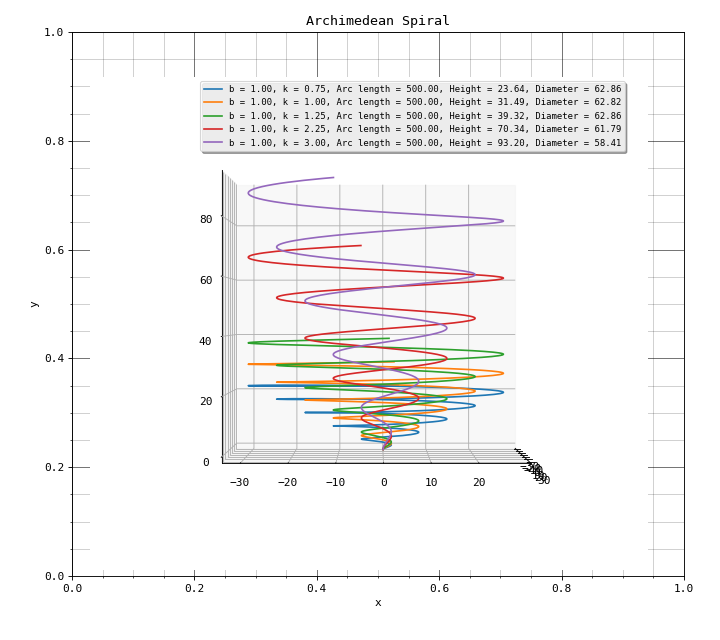

<IPython.core.display.Javascript object>


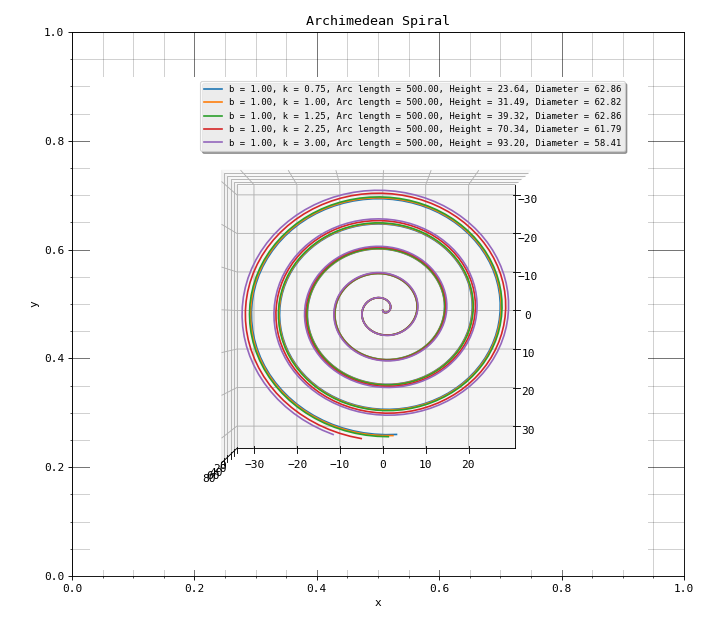

In [24]:
L = 500
t_min = 0.0
t_max = 20.0*np.pi
m_test = bisection_wrapper(L, b, k, t_min)

values = []
for b, k in [(1, 0.75), (1, 1), (1, 1.25), (1, 2.25), (1, 3) ]:        
    o = optimize.bisect(bisection_wrapper(L, b, k, t_min), t_min,  t_max)
    values.append((b, k, t_min, o))

plot_spiral2(values, elevation=0.0, azimuth=0.0)
plot_spiral2(values, elevation=90.0, azimuth=0.0)

# Angle of Conic Spiral

If we know what the height of the spiral is and the maximum radius we can figure what the angle is from the vertical (imagine a rod going through the center, the angle would be measured from it)

Max Radius = 31.429
Height = 23.635
Angle = 0.926 (53.056 Degrees)


<IPython.core.display.Javascript object>


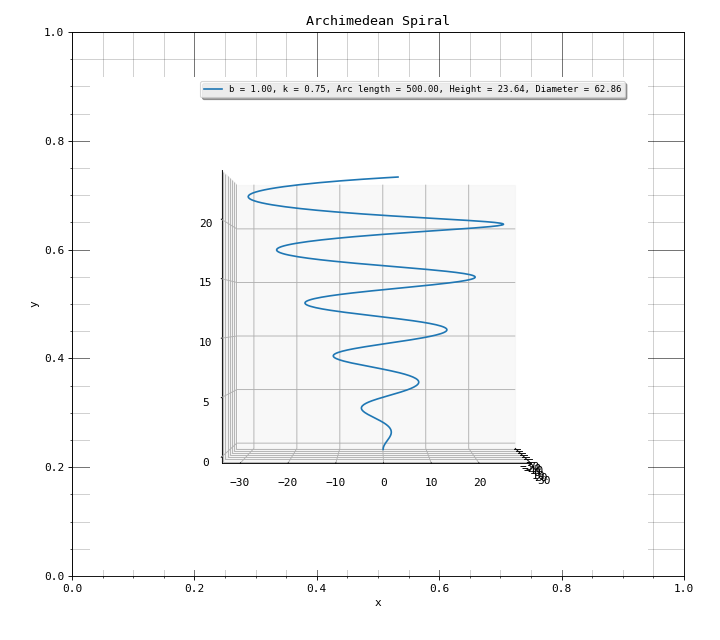

<IPython.core.display.Javascript object>


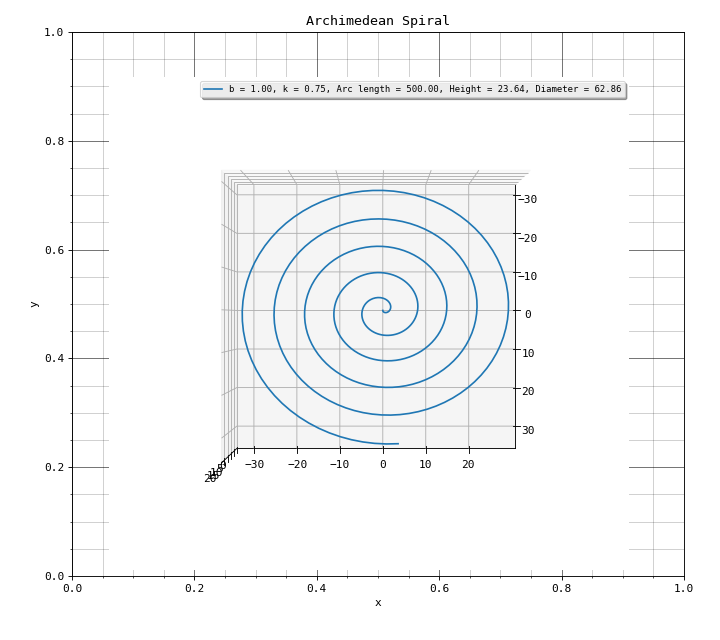

In [25]:
L = 500
t_min = 0.0
t_max = 20.0*np.pi
m_test = bisection_wrapper(L, b, k, t_min)

values = []
# for b, k in [(1, 0.75), (1, 1), (1, 1.25), (1, 2.25), (1, 3) ]:        
for b, k in [(1, 0.75)]:        
    o = optimize.bisect(bisection_wrapper(L, b, k, t_min), t_min,  t_max)
    values.append((b, k, t_min, o))
  
    theta = np.linspace(t_min, o, 400)

    x = b*theta*np.cos(theta)
    y = b*theta*np.sin(theta)    
    z = k*theta

    height = np.max(z)
    max_radius = np.max(x)
    
    angle = np.arctan(max_radius/height)
    print('Max Radius = {:.3f}'.format(max_radius))
    print('Height = {:.3f}'.format(height))
    print('Angle = {:.3f} ({:.3f} Degrees)'.format(angle, np.degrees(angle)))
    
plot_spiral2(values, elevation=0.0, azimuth=0.0)
plot_spiral2(values, elevation=90.0, azimuth=0.0)


# Solving for Support Points

We know that the parametric equations for the spiral are:

$$x(t) = b \cdot t \cdot \cos (t)$$
$$y(t) = b \cdot t \cdot \sin (t)$$
$$z(t) = k \cdot t$$

Where $b$ and $k$ are constants that control the shape and height of the spiral and $t$ is the angle in radians.

If we know that we are interested in some sort of multiples of $\pi$ we should be able to determine the elevation. We can set either $x$ or $y$ to $0$ and determine what angles are valid for that...


$$x(t) = b \cdot t \cdot \cos (t) = 0$$


$$t = \pi \cdot n - \frac{\pi}{2} \;; \text{where} \; n \in \mathbb{Z}$$


We can do the same thing by setting $y=0$ so that we get supports on all 4 quadrants.

$$y(t) = b \cdot t \cdot \sin (t) = 0$$

$$t = \pi \cdot n \;; \text{where} \; n \in \mathbb{Z}$$


x =   0.0 (cm); y =   1.6 (cm); z =  4.7  (cm); Length (xy) =  1.6  (cm)
x =  -0.0 (cm); y =  -4.7 (cm); z = 14.1  (cm); Length (xy) =  4.7  (cm)
x =   0.0 (cm); y =   7.9 (cm); z = 23.6  (cm); Length (xy) =  7.9  (cm)
x =  -0.0 (cm); y = -11.0 (cm); z = 33.0  (cm); Length (xy) = 11.0  (cm)
x =   0.0 (cm); y =  14.1 (cm); z = 42.4  (cm); Length (xy) = 14.1  (cm)
x =  -0.0 (cm); y = -17.3 (cm); z = 51.8  (cm); Length (xy) = 17.3  (cm)
x =  -0.0 (cm); y =  20.4 (cm); z = 61.3  (cm); Length (xy) = 20.4  (cm)
x =  -0.0 (cm); y = -23.6 (cm); z = 70.7  (cm); Length (xy) = 23.6  (cm)
x =  -0.0 (cm); y =  26.7 (cm); z = 80.1  (cm); Length (xy) = 26.7  (cm)
x =  -0.0 (cm); y = -29.8 (cm); z = 89.5  (cm); Length (xy) = 29.8  (cm)
x =  -3.1 (cm); y =   0.0 (cm); z =  9.4  (cm); Length (xy) =  3.1  (cm)
x =   6.3 (cm); y =  -0.0 (cm); z = 18.8  (cm); Length (xy) =  6.3  (cm)
x =  -9.4 (cm); y =   0.0 (cm); z = 28.3  (cm); Length (xy) =  9.4  (cm)
x =  12.6 (cm); y =  -0.0 (cm); z = 37.7  (cm); Len

<IPython.core.display.Javascript object>


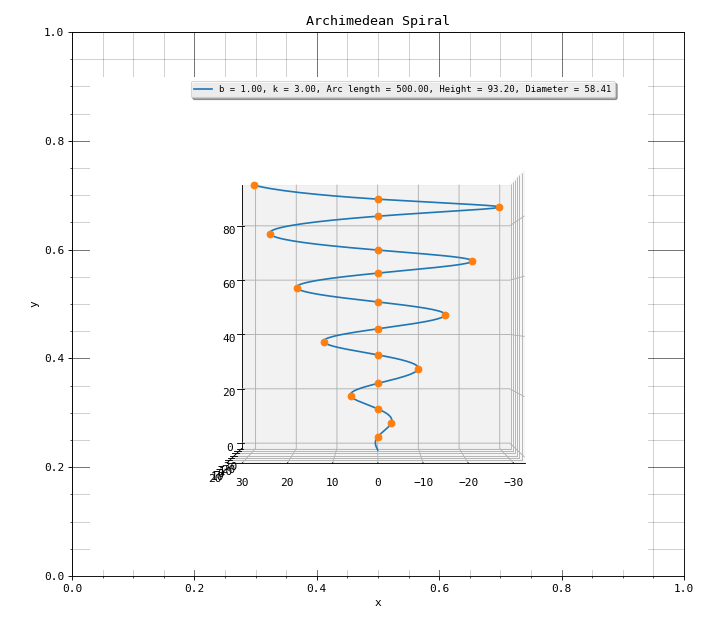

<IPython.core.display.Javascript object>


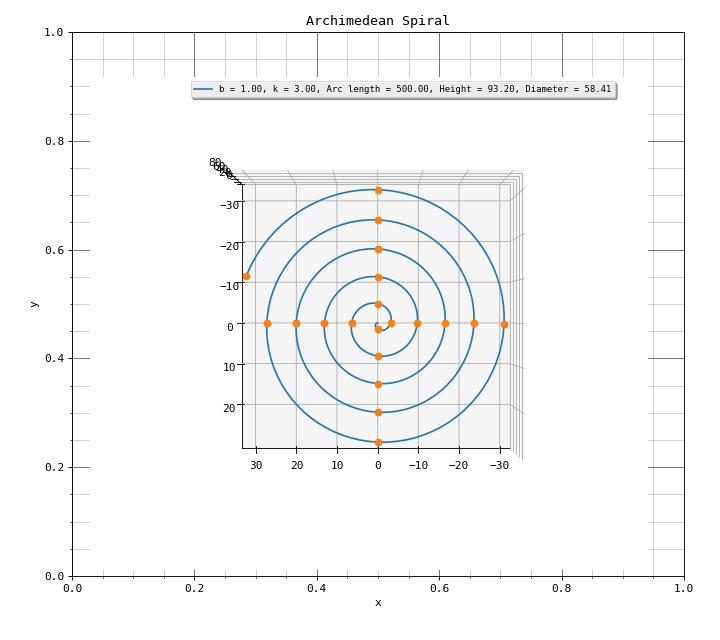

<IPython.core.display.Javascript object>


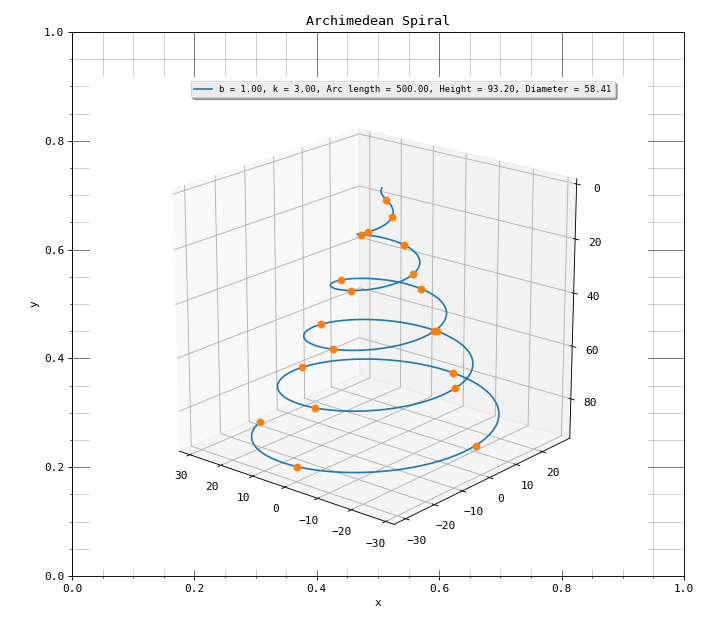

In [26]:
# figure out where the support points could go

L = 500 # cm
t_min = 0.0
t_max = 20.0*np.pi
m_test = bisection_wrapper(L, b, k, t_min)

values = []
coordinates = []
x_coordinates = []
y_coordinates = []
# for b, k in [(1, 0.75), (1, 1), (1, 1.25), (1, 2.25), (1, 3) ]:        
for b, k in [(1, 3)]:         
    o = optimize.bisect(bisection_wrapper(L, b, k, t_min), t_min,  t_max)        
    values.append((b, k, t_min, o))

    # Determine where to place supports for the spiral
    x_zero_angles = []
    for i in range(1, 100):
        angle = np.pi*i - np.pi/2
        if angle <= o:
            x_zero_angles.append(angle)
            
        else:
            break
    
    y_zero_angles = []
    for i in range(1, 100):
        angle = np.pi*i
        if angle <= o:
            y_zero_angles.append(angle)
            
        else:
            break
    
#     x_zero_angles = []
#     y_zero_angles = []
#     for i in range(1, 100):
#         angle_x = np.pi*i - np.pi/2
#         angle_y = np.pi*i
#         if angle_x <= o:
#             x_zero_angles.append(angle)
        
#         if angle_y <= o:
#             y_zero_angles.append(angle)
        
    x_coordinates = [conic_spiral_coordinates(b, k, a) for a in x_zero_angles]
    y_coordinates = [conic_spiral_coordinates(b, k, a) for a in y_zero_angles]
    
    coordinates = x_coordinates[:]
    coordinates.extend(y_coordinates[:])
    coordinates.append(conic_spiral_coordinates(b, k, o)) # add the coordinate of the end of the strip

    for coordinate in coordinates:        
        length = np.sqrt(coordinate[0]**2 + coordinate[1]**2)
        print('x = {:5.1f} (cm); y = {:5.1f} (cm); z = {:4.1f}  (cm); Length (xy) = {:4.1f}  (cm)'.format(*coordinate, 
                                                                                                          length))

    print('----------')
    print('Total Length (xy) = {:5.1f} (cm)'.format(np.sum(np.sqrt([coordinate[0]**2 + 
                                                                    coordinate[1]**2 for coordinate in coordinates]))))
    print('Total Support Count = {}'.format(len(coordinates)))

#     print('len(x_coordinates) = {}'.format(len(x_coordinates)))
#     print('len(y_coordinates) = {}'.format(len(y_coordinates)))
#     print('x_zero_angles ({}) = {}'.format(len(x_zero_angles), x_zero_angles))
#     print('y_zero_angles ({}) = {}'.format(len(y_zero_angles), y_zero_angles))

    plot_spiral2(values, elevation=0.0, azimuth=90.0, intersection_points=coordinates)
    plot_spiral2(values, elevation=90.0, azimuth=90.0, intersection_points=coordinates)        
    plot_spiral2(values, elevation=-160.0, azimuth=50.0, intersection_points=coordinates)        

According to the results above, the y sign indicates which side of the dowling to drill the hole on the rod. The signs alternate as it comes down...

In [27]:
# let's see if we can approximate the length by a series of 1/2 circles circles by using 
# the intersection points. From the above we have:

# We'll use the y-coordinate of the intersection points (from above) which we'll take to represent the radius of
# a series of concentric circles

# the formula for the circumference of a circle is 2*pi*r. We only need half that
l = sum([np.pi*np.abs(y) for x,y,z in x_coordinates])
print('l = {}'.format(l))
# >>> l = 493.48137402588463
# as we can see that is pretty damn close to the line integral

l = sum([np.pi*np.abs(x) for x,y,z in y_coordinates])
print('l = {}'.format(l)) # this one is less because there is one less loop


l = 493.4802200544679
l = 444.1321980490211


http://oatzy.blogspot.ca/2012/12/is-there-formula-for-perfect-christmas.html

# 2.5m Tall Sprial

x =   0.0 (cm); y =   1.6 (cm); z =  4.7  (cm); Length (xy) =  1.6  (cm)
x =  -0.0 (cm); y =  -4.7 (cm); z = 14.1  (cm); Length (xy) =  4.7  (cm)
x =   0.0 (cm); y =   7.9 (cm); z = 23.6  (cm); Length (xy) =  7.9  (cm)
x =  -0.0 (cm); y = -11.0 (cm); z = 33.0  (cm); Length (xy) = 11.0  (cm)
x =   0.0 (cm); y =  14.1 (cm); z = 42.4  (cm); Length (xy) = 14.1  (cm)
x =  -0.0 (cm); y = -17.3 (cm); z = 51.8  (cm); Length (xy) = 17.3  (cm)
x =  -0.0 (cm); y =  20.4 (cm); z = 61.3  (cm); Length (xy) = 20.4  (cm)
x =  -3.1 (cm); y =   0.0 (cm); z =  9.4  (cm); Length (xy) =  3.1  (cm)
x =   6.3 (cm); y =  -0.0 (cm); z = 18.8  (cm); Length (xy) =  6.3  (cm)
x =  -9.4 (cm); y =   0.0 (cm); z = 28.3  (cm); Length (xy) =  9.4  (cm)
x =  12.6 (cm); y =  -0.0 (cm); z = 37.7  (cm); Length (xy) = 12.6  (cm)
x = -15.7 (cm); y =   0.0 (cm); z = 47.1  (cm); Length (xy) = 15.7  (cm)
x =  18.8 (cm); y =  -0.0 (cm); z = 56.5  (cm); Length (xy) = 18.8  (cm)
x = -20.4 (cm); y =   7.2 (cm); z = 65.0  (cm); Len

D:\python\anaconda_4.3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


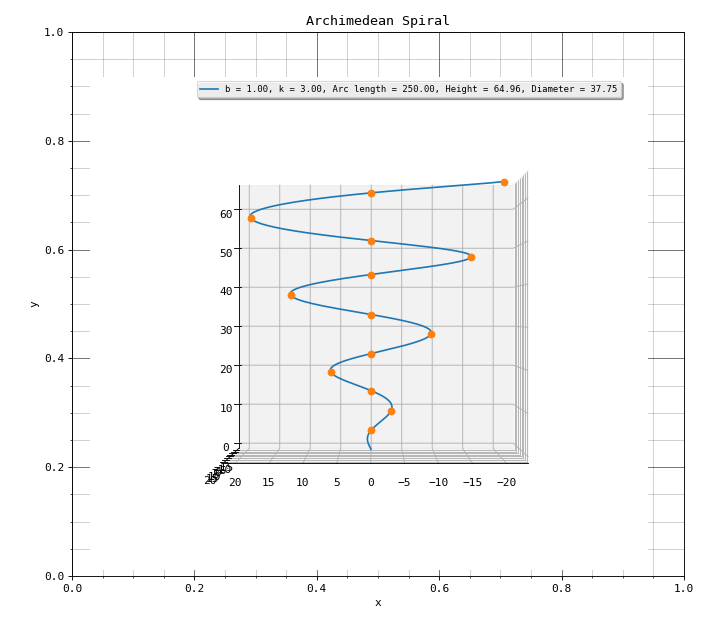

<IPython.core.display.Javascript object>


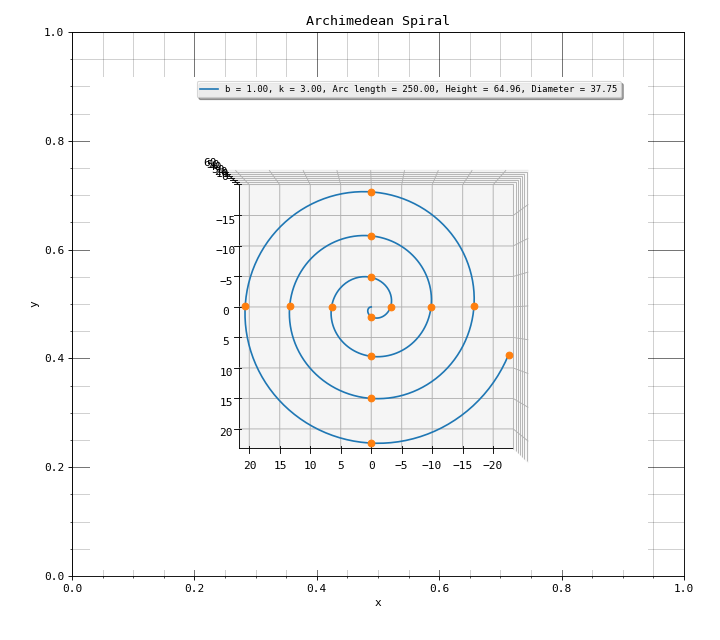

<IPython.core.display.Javascript object>


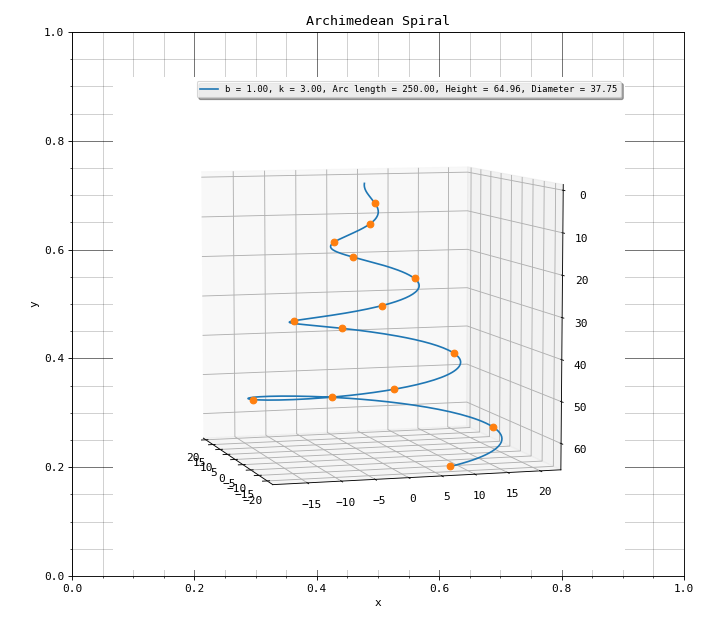

In [29]:
L = 250 # cm
t_min = 0.0
t_max = 20.0*np.pi
m_test = bisection_wrapper(L, b, k, t_min)

values = []
coordinates = []
x_coordinates = []
y_coordinates = []
# for b, k in [(1, 0.75), (1, 1), (1, 1.25), (1, 2.25), (1, 3) ]:        
for b, k in [(1, 3)]:         
    o = optimize.bisect(bisection_wrapper(L, b, k, t_min), t_min,  t_max)        
    values.append((b, k, t_min, o))

    # Determine where to place supports for the spiral
    x_zero_angles = []
    for i in range(1, 100):
        angle = np.pi*i - np.pi/2
        if angle <= o:
            x_zero_angles.append(angle)
            
        else:
            break
    
    y_zero_angles = []
    for i in range(1, 100):
        angle = np.pi*i
        if angle <= o:
            y_zero_angles.append(angle)
            
        else:
            break
    
    x_coordinates = [conic_spiral_coordinates(b, k, a) for a in x_zero_angles]
    y_coordinates = [conic_spiral_coordinates(b, k, a) for a in y_zero_angles]
    
    coordinates = x_coordinates[:]
    coordinates.extend(y_coordinates[:])
    coordinates.append(conic_spiral_coordinates(b, k, o)) # add the coordinate of the end of the strip

    for coordinate in coordinates:        
        length = np.sqrt(coordinate[0]**2 + coordinate[1]**2)
        print('x = {:5.1f} (cm); y = {:5.1f} (cm); z = {:4.1f}  (cm); Length (xy) = {:4.1f}  (cm)'.format(*coordinate, 
                                                                                                          length))

    print('----------')
    print('Total Length (xy) = {:5.1f} (cm)'.format(np.sum(np.sqrt([coordinate[0]**2 + 
                                                                    coordinate[1]**2 for coordinate in coordinates]))))
    print('Total Support Count = {}'.format(len(coordinates)))

    plot_spiral2(values, elevation=0.0, azimuth=90.0, intersection_points=coordinates)
    plot_spiral2(values, elevation=90.0, azimuth=90.0, intersection_points=coordinates)        
    plot_spiral2(values, elevation=-160.0, azimuth=50.0, intersection_points=coordinates)        